#### 잠깐 basic

In [10]:
even_nums = (2,4,6,8,10)
even_nums

(2, 4, 6, 8, 10)

In [11]:
a, b, c, d, e = even_nums   # tuple unpacking

In [12]:
d

8

# Contents
 - User-defined functions
 - scope (global scope / local scope / built-in scope)
 - 

## # user-defined functions

#### Docstrings
 - describe what the function does
 - serve as documentation for the function
 - placed in the immediate line after the function header
 - in between triple double quotes """

In [13]:
def two_times(number):               # function header
    """Return number * 2 values"""   # function body
    result = number * 2              # function body
    return result                    # function body

## # scope
 - global scope: defined in the main body of a script
 - local scope: defined inside a function
 - built-in scope: names in the pre-defined built-ins module

## # EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
d = sns.load_dataset('iris')
d.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [6]:
dd = d.iloc[0:50,:]
dd['sepal_length'].value_counts()

5.1    8
5.0    8
5.4    5
4.8    5
4.9    4
4.6    4
4.4    3
5.2    3
4.7    2
5.7    2
5.5    2
4.3    1
5.8    1
4.5    1
5.3    1
Name: sepal_length, dtype: int64

In [7]:
dd['sepal_length'].value_counts().sort_index()

4.3    1
4.4    3
4.5    1
4.6    4
4.7    2
4.8    5
4.9    4
5.0    8
5.1    8
5.2    3
5.3    1
5.4    5
5.5    2
5.7    2
5.8    1
Name: sepal_length, dtype: int64

In [8]:
dd.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [9]:
dd.mean()

<ipython-input-9-bd2241ceb999>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dd.mean()


sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
dtype: float64

In [12]:
dd = dd.replace([5.0,5.1], np.nan)
dd.mean()

<ipython-input-12-be1dbbea02d6>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dd.mean()


sepal_length    4.985294
sepal_width     3.428000
petal_length    1.462000
petal_width     0.246000
dtype: float64

In [13]:
dd.replace([5.0,5.1], np.nan, inplace=True)

#### Histogram

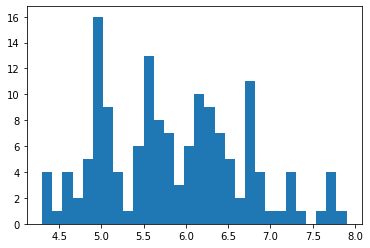

In [17]:
import matplotlib.pyplot as plt
plt.hist(d['sepal_length'].dropna(), bins=30)
plt.show()

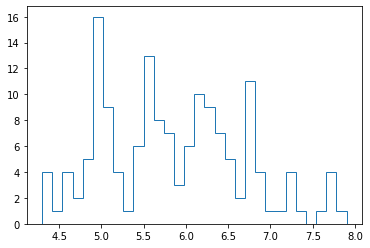

In [27]:
import matplotlib.pyplot as plt
plt.hist(d['sepal_length'].dropna(), bins=30, histtype='step')
plt.show()

#### filtering & histogram

In [22]:
is_larger_than_5 = d['sepal_length'] > 5
is_larger_than_5.head(3)

0     True
1    False
2    False
Name: sepal_length, dtype: bool

In [23]:
is_larger_than_5.sum(), larger_than_5.mean()

(118, 0.7866666666666666)

In [25]:
# Filtering
len_sep = d['sepal_length']
sep_larger_than_5 = len_sep[is_larger_than_5]
sep_larger_than_5.mean()

6.129661016949153

In [26]:
# Filtering
len_sep = d['sepal_length']
sep_larger_than_5 = len_sep[~is_larger_than_5]
sep_larger_than_5.mean()

4.7875000000000005

In [32]:
# Filtering
len_sep = d['sepal_length']

is_larger_than_5 = d['sepal_length'] > 5
is_smaller_than_6 = d['sepal_length'] < 6

sep_between_5_and_6 = len_sep[is_larger_than_5 & is_smaller_than_6]
sep_larger_than_5_and_6 = len_sep[is_larger_than_5 & ~is_smaller_than_6]
display(
    sep_between_5_and_6.head(5),
    sep_larger_than_5_and_6.head(5)
)

0     5.1
5     5.4
10    5.4
14    5.8
15    5.7
Name: sepal_length, dtype: float64

50    7.0
51    6.4
52    6.9
54    6.5
56    6.3
Name: sepal_length, dtype: float64

## # distributions

In [33]:
import pandas as pd
gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head(3)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339


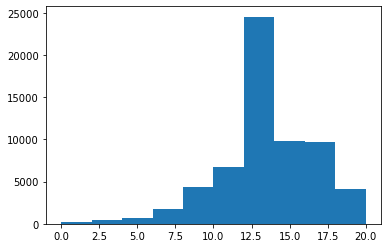

In [37]:
educ = gss['educ']
plt.hist(educ, label='educ')
plt.show()

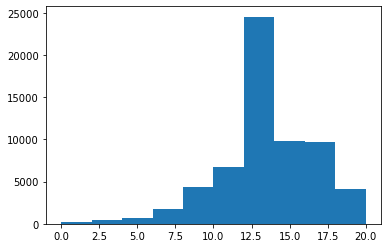

In [38]:
educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.show()

#### PMF

In [63]:
from empiricaldist import Pmf
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head(3)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339


In [72]:
gss_2012 = gss[gss['year']==2012]
gss_2012.head(2)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
55087,2012,57.0,1955.0,1,1,12.0,NaN,2.0,NaN,0.823796
55088,2012,29.0,1983.0,1,2,13.0,10412.5,NaN,1.0,1.235694


In [73]:
educ = gss_2012['educ']
educ.head()

55087    12.0
55088    13.0
55089    12.0
55090    12.0
55091    12.0
Name: educ, dtype: float64

In [74]:
pmf_educ = empiricaldist.Pmf(educ)
pmf_educ.head()

,probs
55087,12.0
55088,13.0
55089,12.0


#### NG

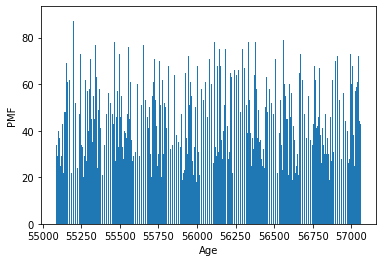

In [77]:
# Select the age column (Series)
age = gss_2012['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()